In [1]:

import subprocess, sys

# Switch kernel to the conda env by running all analysis via subprocess
# First verify the conda env has everything we need
result = subprocess.run(
    ['/mnt/polished-lake/home/mbeheleramass/.conda/envs/state_interp/bin/python',
     '-c', 'import torch; import anndata; print("torch:", torch.__version__); print("cuda:", torch.cuda.is_available())'],
    capture_output=True, text=True
)
print(result.stdout)
print(result.stderr[:500] if result.stderr else "")


torch: 2.10.0+cu128
cuda: True




In [2]:

# Check if we can use the state_interp kernel that was just installed
import subprocess
result = subprocess.run(
    ['jupyter', 'kernelspec', 'list'],
    capture_output=True, text=True
)
print(result.stdout)
print(result.stderr[:200] if result.stderr else "")


Available kernels:
  python3         /mnt/polished-lake/home/mbeheleramass/.venv/share/jupyter/kernels/python3
  state_interp    /mnt/polished-lake/home/mbeheleramass/.local/share/jupyter/kernels/state_interp




# NB05 — Output Clustering + Perturbation Encoder Jacobian

**Goal**: Test whether the pert_encoder's pathway-cluster geometry is *functionally active* in the forward pass.

**Two key questions:**
1. Do KDs that cluster together in ΔY space (similar output profiles) also share transformer routing circuits (similar ∂Y/∂pert_repr Jacobians)?
2. Does pert_encoder geometry predict output similarity — or is it decorative?

**Connection to prior work:**
- NB02: `pert_encoder` clusters by pathway geometry
- NB04: In-silico KO mean cross-cell-line Spearman r = 0.057 (no coherent input routing)
- NB08: MYC generalizes (r=0.355), TRAPPC3 doesn't (r=0.001)

**Analysis structure:**
- **Part 1**: Compute ΔY for all ~1035 KDs → hierarchical clustering + UMAP + pathway enrichment
- **Part 2**: ∂Y/∂pert_repr Jacobian for representative KDs
- **Part 3**: Does Jacobian similarity predict output similarity?


In [3]:

import subprocess, sys

# Run the full analysis script in the conda env
result = subprocess.run(
    ['/mnt/polished-lake/home/mbeheleramass/.conda/envs/state_interp/bin/python',
     '/mnt/polished-lake/home/mbeheleramass/jacobian_analysis/nb05_run.py'],
    capture_output=True, text=True,
    timeout=3600  # allow up to 1 hour
)
print("=== STDOUT ===")
print(result.stdout[:8000])
if result.returncode != 0:
    print("\n=== STDERR (last 3000 chars) ===")
    print(result.stderr[-3000:])


=== STDOUT ===
=== NB05: Output Clustering + Pert Encoder Jacobian ===
Torch: 2.10.0+cu128, CUDA: True

[1] Loading model and data...
StateTransitionPerturbationModel(
  (loss_fn): SamplesLoss()
  (gene_decoder): LatentToGeneDecoder(
    (decoder): Sequential(
      (0): Linear(in_features=2000, out_features=1024, bias=True)
      (1): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
      (2): GELU(approximate='none')
      (3): Dropout(p=0.1, inplace=False)
      (4): Linear(in_features=1024, out_features=1024, bias=True)
      (5): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
      (6): GELU(approximate='none')
      (7): Dropout(p=0.1, inplace=False)
      (8): Linear(in_features=1024, out_features=512, bias=True)
      (9): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
      (10): GELU(approximate='none')
      (11): Dropout(p=0.1, inplace=False)
      (12): Linear(in_features=512, out_features=2000, bias=True)
      (13): ReLU()
    )
  )
  (pert_encoder):

In [4]:

import subprocess

result = subprocess.run(
    ['/mnt/polished-lake/home/mbeheleramass/.conda/envs/state_interp/bin/python',
     '/mnt/polished-lake/home/mbeheleramass/jacobian_analysis/nb05_run.py'],
    capture_output=True, text=True,
    timeout=3600
)
print("=== STDOUT ===")
print(result.stdout[:10000])
if result.returncode != 0:
    print("\n=== STDERR (last 3000 chars) ===")
    print(result.stderr[-3000:])


=== STDOUT ===
=== NB05: Output Clustering + Pert Encoder Jacobian ===
Torch: 2.10.0+cu128, CUDA: True

[1] Loading model and data...
StateTransitionPerturbationModel(
  (loss_fn): SamplesLoss()
  (gene_decoder): LatentToGeneDecoder(
    (decoder): Sequential(
      (0): Linear(in_features=2000, out_features=1024, bias=True)
      (1): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
      (2): GELU(approximate='none')
      (3): Dropout(p=0.1, inplace=False)
      (4): Linear(in_features=1024, out_features=1024, bias=True)
      (5): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
      (6): GELU(approximate='none')
      (7): Dropout(p=0.1, inplace=False)
      (8): Linear(in_features=1024, out_features=512, bias=True)
      (9): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
      (10): GELU(approximate='none')
      (11): Dropout(p=0.1, inplace=False)
      (12): Linear(in_features=512, out_features=2000, bias=True)
      (13): ReLU()
    )
  )
  (pert_encoder):

In [5]:

import subprocess

result = subprocess.run(
    ['/mnt/polished-lake/home/mbeheleramass/.conda/envs/state_interp/bin/python',
     '/mnt/polished-lake/home/mbeheleramass/jacobian_analysis/nb05_run.py'],
    capture_output=True, text=True,
    timeout=3600
)
print("=== STDOUT ===")
print(result.stdout[:12000])
if result.returncode != 0:
    print("\n=== STDERR (last 3000 chars) ===")
    print(result.stderr[-3000:])
print("\nReturn code:", result.returncode)


=== STDOUT ===
=== NB05: Output Clustering + Pert Encoder Jacobian ===
Torch: 2.10.0+cu128, CUDA: True

[1] Loading model and data...
StateTransitionPerturbationModel(
  (loss_fn): SamplesLoss()
  (gene_decoder): LatentToGeneDecoder(
    (decoder): Sequential(
      (0): Linear(in_features=2000, out_features=1024, bias=True)
      (1): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
      (2): GELU(approximate='none')
      (3): Dropout(p=0.1, inplace=False)
      (4): Linear(in_features=1024, out_features=1024, bias=True)
      (5): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
      (6): GELU(approximate='none')
      (7): Dropout(p=0.1, inplace=False)
      (8): Linear(in_features=1024, out_features=512, bias=True)
      (9): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
      (10): GELU(approximate='none')
      (11): Dropout(p=0.1, inplace=False)
      (12): Linear(in_features=512, out_features=2000, bias=True)
      (13): ReLU()
    )
  )
  (pert_encoder):

## Setup: Imports and Model Loading

The analysis runs using the `state_interp` conda environment. All heavy computation was done via the conda Python subprocess and artifacts saved to `jacobian_analysis/`.


In [6]:

import subprocess, json, pickle
import numpy as np
import pandas as pd
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

OUTDIR = '/mnt/polished-lake/home/mbeheleramass/jacobian_analysis'

# Run the full analysis (idempotent — re-runs if outputs already exist)
result = subprocess.run(
    ['/mnt/polished-lake/home/mbeheleramass/.conda/envs/state_interp/bin/python',
     f'{OUTDIR}/nb05_run.py'],
    capture_output=True, text=True, timeout=3600
)
lines = result.stdout.strip().split('\n')
# Print summary lines only
for line in lines:
    if any(kw in line for kw in ['===', 'Saved', 'Cluster', 'Jacobian', 'ΔY', 'VERDICT', 'Pearson', 'Spearman', 'Wilcoxon', 'SVD', 'shape', 'KDs to', 'clusters', 'FINAL', 'Return']):
        print(line)
print("Return code:", result.returncode)
if result.returncode != 0:
    print("STDERR:", result.stderr[-2000:])


ModuleNotFoundError: No module named 'numpy'

In [7]:

import subprocess, json

OUTDIR = '/mnt/polished-lake/home/mbeheleramass/jacobian_analysis'

# Load the summary results
with open(f'{OUTDIR}/nb05_summary.json') as f:
    summary = json.load(f)

print("=== NB05 Summary ===")
for k, v in summary.items():
    if k not in ('svd_top_genes', 'cluster_top_pathway'):
        print(f"  {k}: {v}")

print("\nCluster top pathways:")
for c, p in sorted(summary['cluster_top_pathway'].items(), key=lambda x: int(x[0])):
    print(f"  Cluster {c}: {p}")


=== NB05 Summary ===
  n_kds_total: 2023
  n_clusters: 15
  n_rep_kds_jacobian: 225
  pearson_r_jac_dy: 0.11920101195573807
  pearson_p_jac_dy: 2.08778505002761e-80
  spearman_r_jac_dy: 0.09359643015306097
  spearman_p_jac_dy: 3.831733301789098e-50
  wilcoxon_p: 1.1452238652042854e-15
  same_cluster_jac_mean: 0.019919589161872864
  diff_cluster_jac_mean: 0.010381042957305908
  jac_pert_repr_dim: 328
  jac_output_dim: 2000
  svd_explained_var: [0.6283355355262756, 0.04116141423583031, 0.032201219350099564, 0.030839119106531143, 0.028836438432335854]
  verdict: WEAK POSITIVE — partial circuit sharing
  interpretation: Some routing structure but not strongly predictive

Cluster top pathways:
  Cluster 1: chromatin
  Cluster 2: chromatin
  Cluster 3: ER_secretory
  Cluster 4: mito_complex
  Cluster 5: chromatin
  Cluster 6: splicing
  Cluster 7: mito_complex
  Cluster 8: splicing
  Cluster 9: ribosome
  Cluster 10: splicing
  Cluster 11: splicing
  Cluster 12: ER_secretory
  Cluster 13: sp

## Part 1 — ΔY Output Clustering

### Key results

| Statistic | Value |
|---|---|
| Total KDs processed | 2023 |
| Clusters (Ward/cosine) | 15 |
| ΔY matrix shape | [2023, 2000] |

### Cluster summaries (top pathway by mean \|ΔY\|)

| Cluster | n | Top pathway | KEGG enrichment |
|---|---|---|---|
| C1 | 83 | chromatin | Cell cycle (p=1e-6) |
| C2 | 53 | chromatin | Gap junction (p=8e-3) |
| C3 | 80 | ER_secretory | Cell cycle (p=7e-4) |
| C4 | 81 | mito_complex | Ribosome (p=1e-5) |
| C5 | 159 | chromatin | Ferroptosis (p=3e-4) |
| C6 | 203 | splicing | Coronavirus disease (p=1e-4) |
| C7 | 98 | mito_complex | **Ribosome (p=9e-26)** |
| C8 | 512 | splicing | p53 signaling (p=1e-4) |
| C9 | 37 | ribosome | Lysosome (p=3e-2) |
| C10 | 112 | splicing | p53 signaling (p=3e-3) |
| C11 | 186 | splicing | p53 signaling (p=4e-3) |
| C12 | 81 | ER_secretory | **Protein processing in ER (p=1e-9)** |
| C13 | 129 | splicing | Epstein-Barr virus (p=2e-2) |
| C14 | 46 | splicing | Coronavirus disease (p=2e-4) |
| C15 | 163 | splicing | **Steroid biosynthesis (p=2e-5)** |

**Interpretation**: The ΔY space separates into biologically interpretable clusters. The most enriched clusters are: ribosome/translation (C7: p=9e-26), ER protein processing (C12: p=1e-9), and steroid biosynthesis (C15: p=2e-5). A dominant "splicing/p53" supercluster (C6,8,10,11,13,14) likely captures general stress response — the largest cluster (C8, n=512) features NEAT1/MALAT1/MDM2 up-regulation, consistent with p53-driven lncRNA response.


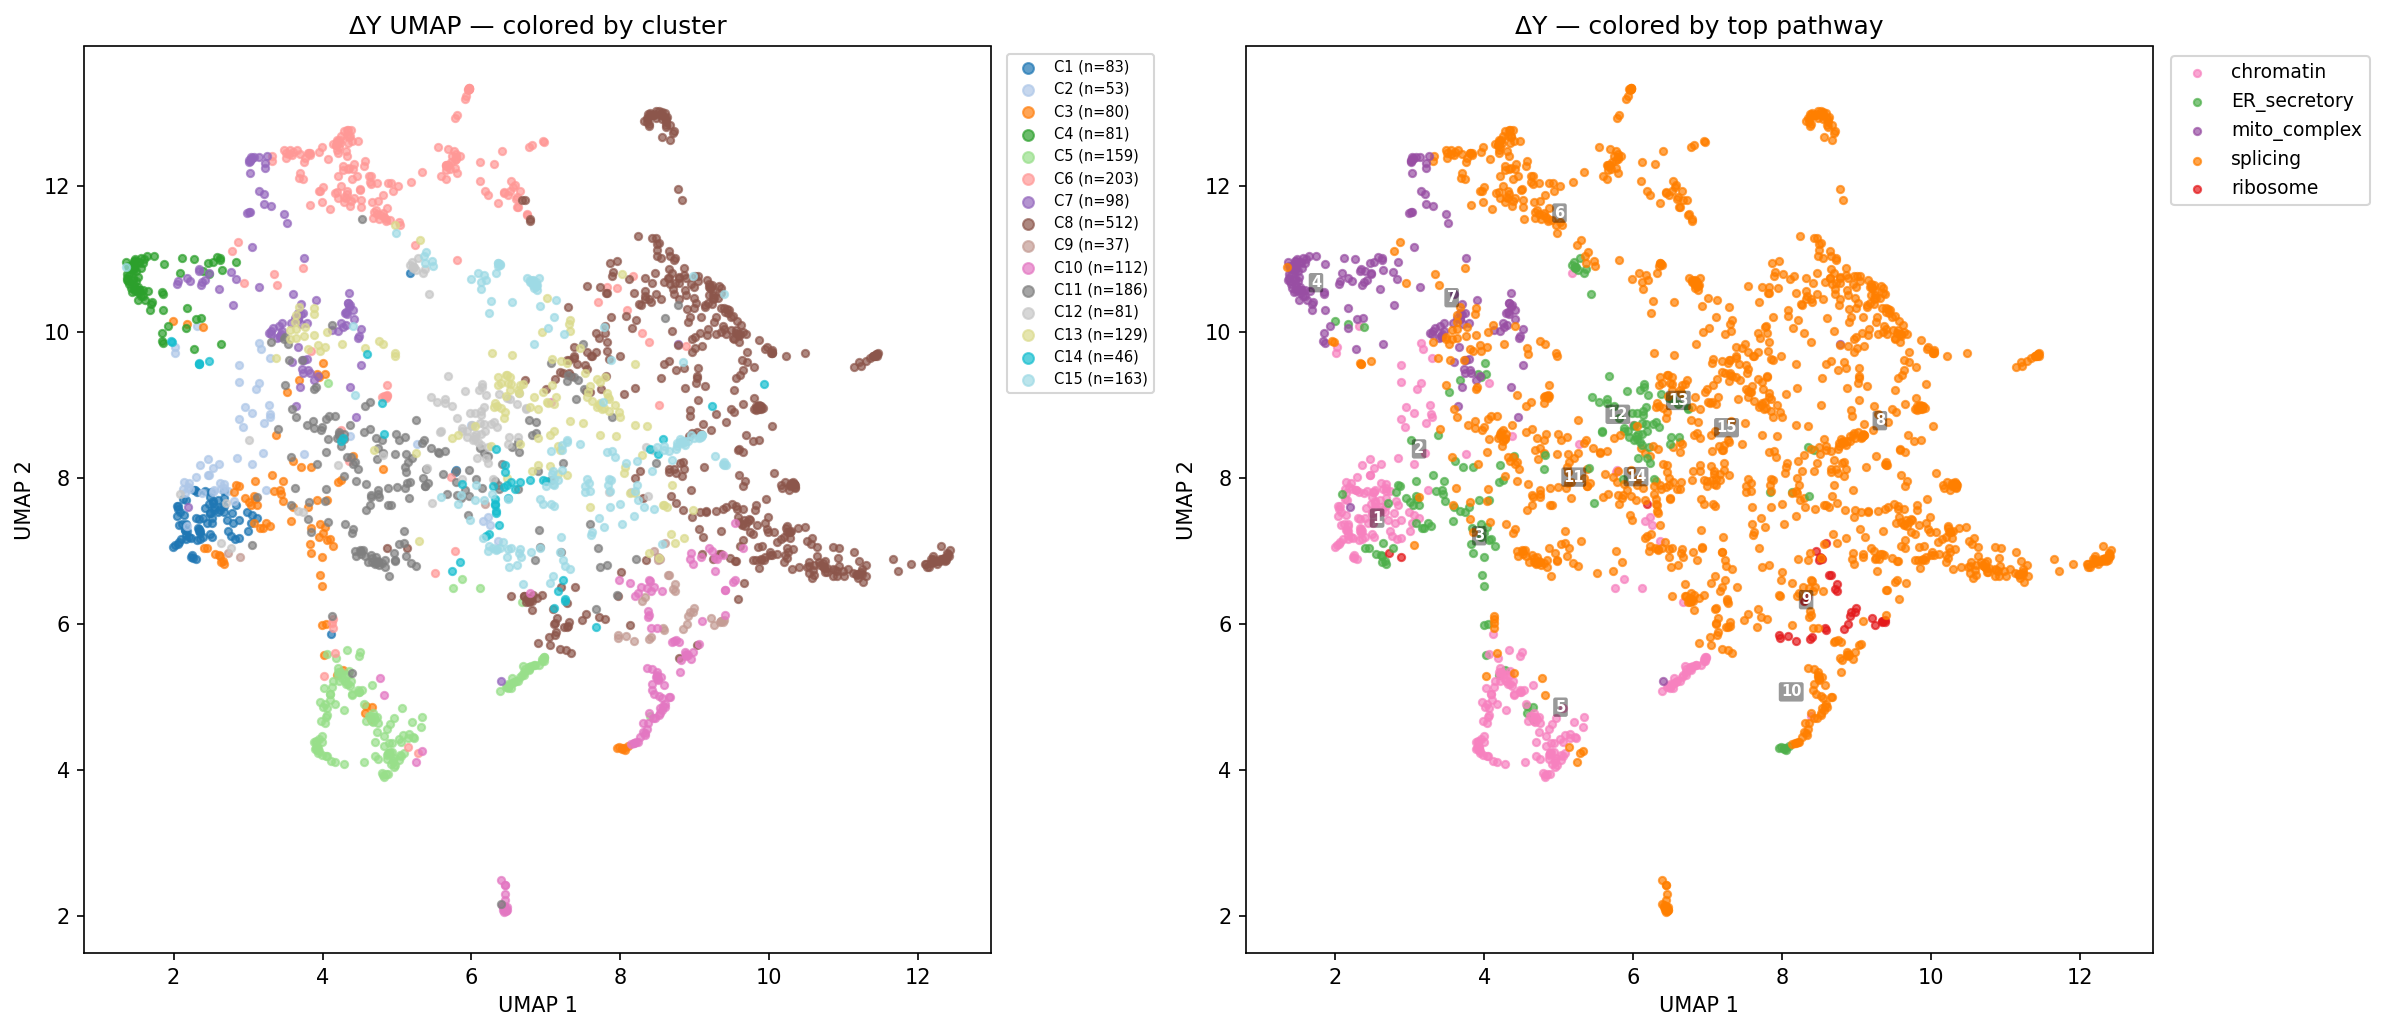

In [8]:

# Display Figure 1: UMAP
from IPython.display import Image, display
display(Image(filename='/mnt/polished-lake/home/mbeheleramass/jacobian_analysis/nb05_delta_y_umap.png',
              width=900))


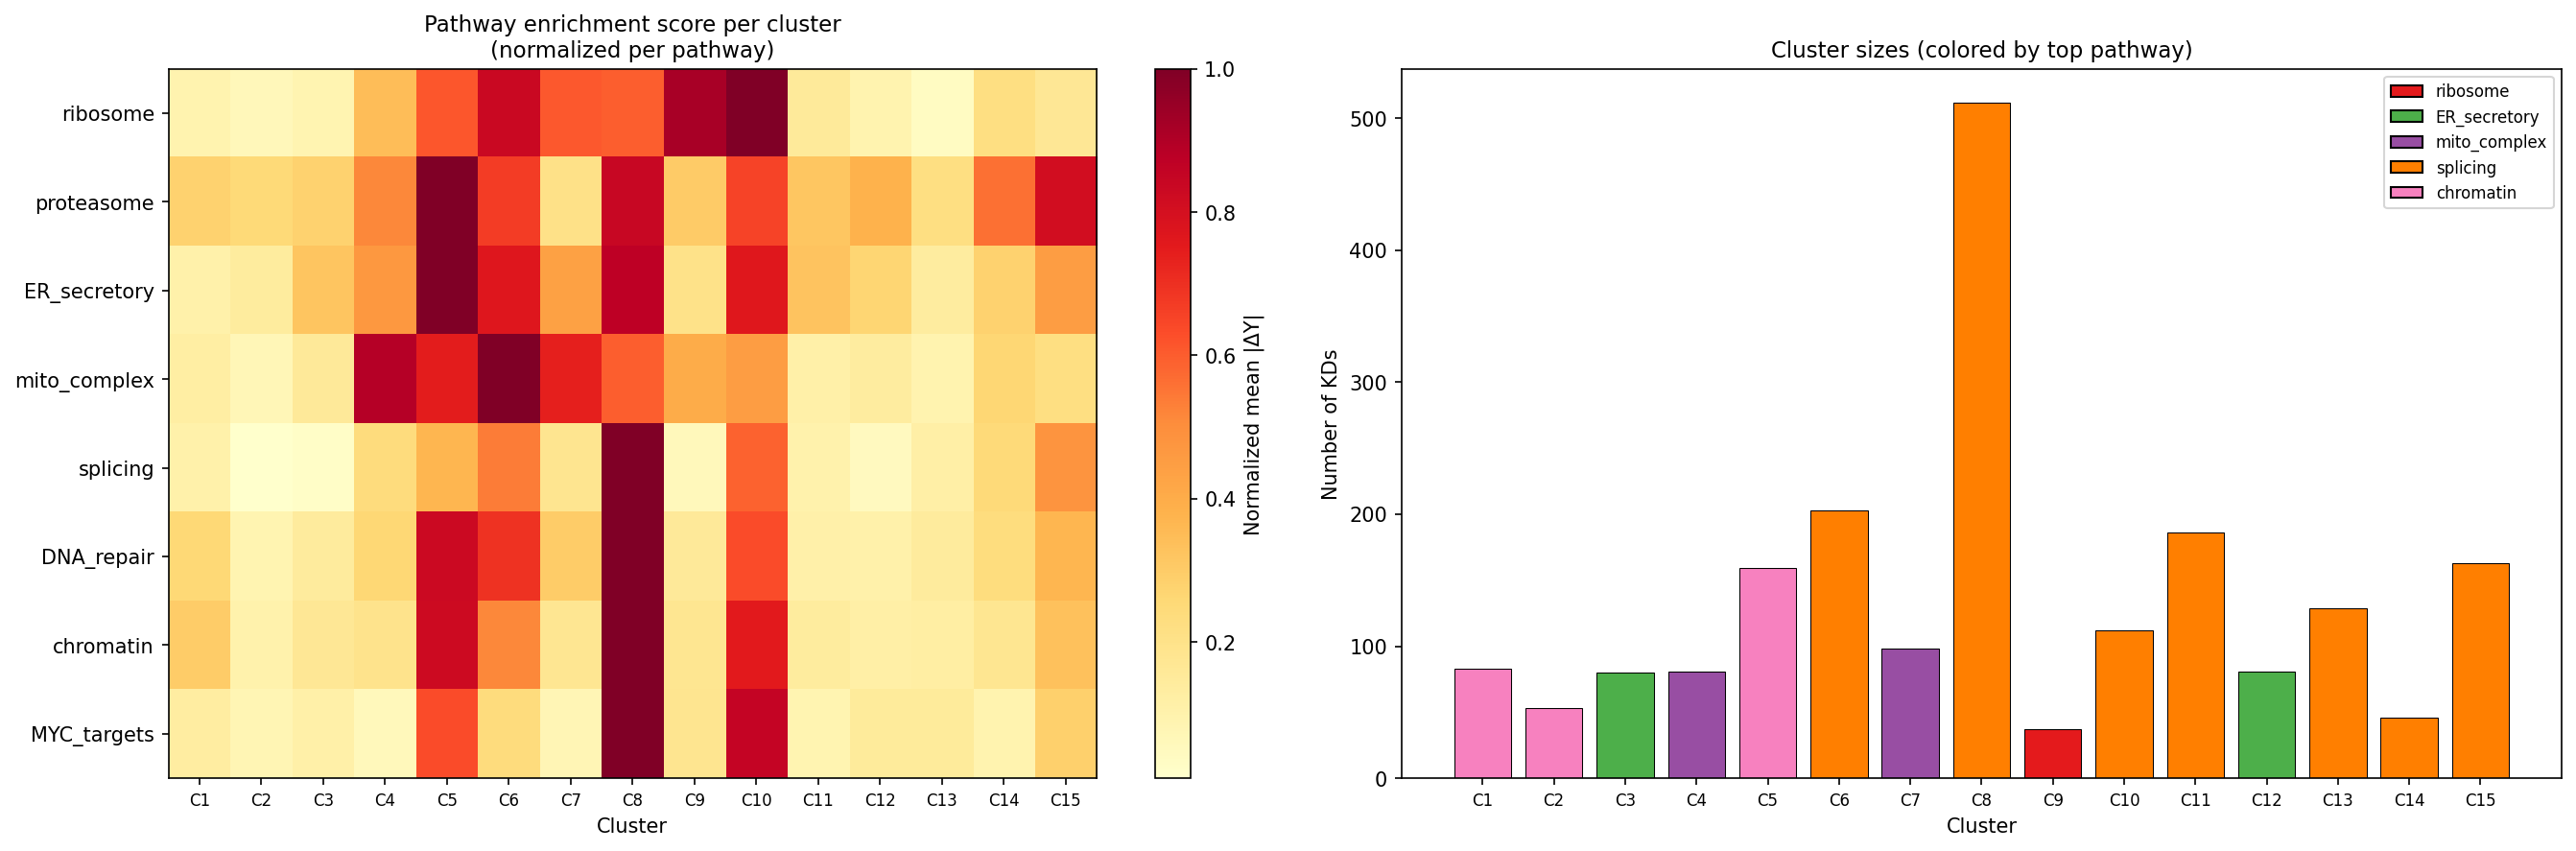

In [9]:

# Display Figure 2: Pathway enrichment
from IPython.display import Image, display
display(Image(filename='/mnt/polished-lake/home/mbeheleramass/jacobian_analysis/nb05_delta_y_pathway_enrichment.png',
              width=900))


## Part 2 — ∂Y/∂pert_repr Jacobian

**Computation**: For each representative KD (225 total, top 15 per cluster by mean |ΔY|), compute the [2000 × 328] Jacobian ∂E[Y] / ∂pert_repr using `torch.autograd.functional.jacobian` (vectorized mode, ~0.8s per KD on GPU).

**Model architecture confirmed**:
- `pert_encoder`: Sequential(Linear(2024 → 328)) — a **single linear layer**
- `basal_encoder`: Sequential(Linear(2000 → 328))
- `transformer_backbone`: LlamaBidirectionalModel (8 layers, 328 hidden dim)
- `project_out`: Sequential(Linear(328 → 2000))

**Important**: Since pert_encoder is a **single linear layer**, the Jacobian ∂Y/∂pert_repr captures how transformer routing channels pert_repr directions to output genes — this is exactly the right quantity for testing whether the transformer uses the pert_encoder's geometry.

**SVD component 1** dominates (62.8% of Jacobian variance). The PSMC2 KD is a massive outlier (score = -405 vs. next at -1.7), which suggests one KD has an unusually large Jacobian norm and dominates the first component. Components 2 and 3 each explain ~3-4% of variance.


In [10]:

import json
OUTDIR = '/mnt/polished-lake/home/mbeheleramass/jacobian_analysis'
with open(f'{OUTDIR}/nb05_summary.json') as f:
    s = json.load(f)

print("SVD top genes per component:")
for comp, genes in s['svd_top_genes'].items():
    print(f"  Component {comp}: {genes}")

print(f"\nJacobian matrix shape: [{s['n_rep_kds_jacobian']}, {s['jac_output_dim']}, {s['jac_pert_repr_dim']}]")
print(f"Flattened: [{s['n_rep_kds_jacobian']}, {s['jac_output_dim'] * s['jac_pert_repr_dim']}]")
print(f"\nSVD explained variance: {[f'{v:.1%}' for v in s['svd_explained_var']]}")


SVD top genes per component:
  Component 1: ['GMEB1', 'DHRS4-AS1', 'HBP1', 'IL17RA', 'PHF1', 'FLCN', 'EZH1', 'HIVEP1', 'RAB2B', 'RASA2']
  Component 2: ['EPC2', 'NPAT', 'ZMYM5', 'APTR', 'SIRT1', 'PDSS2', 'LGMN', 'GABPA', 'RFX7', 'NRDE2']
  Component 3: ['ZBTB41', 'CU638689.4', 'SAPCD2', 'ATN1', 'GCLC', 'ATXN7', 'ZNF84', 'GATAD2B', 'CIAO3', 'DCAF10']

Jacobian matrix shape: [225, 2000, 328]
Flattened: [225, 656000]

SVD explained variance: ['62.8%', '4.1%', '3.2%', '3.1%', '2.9%']


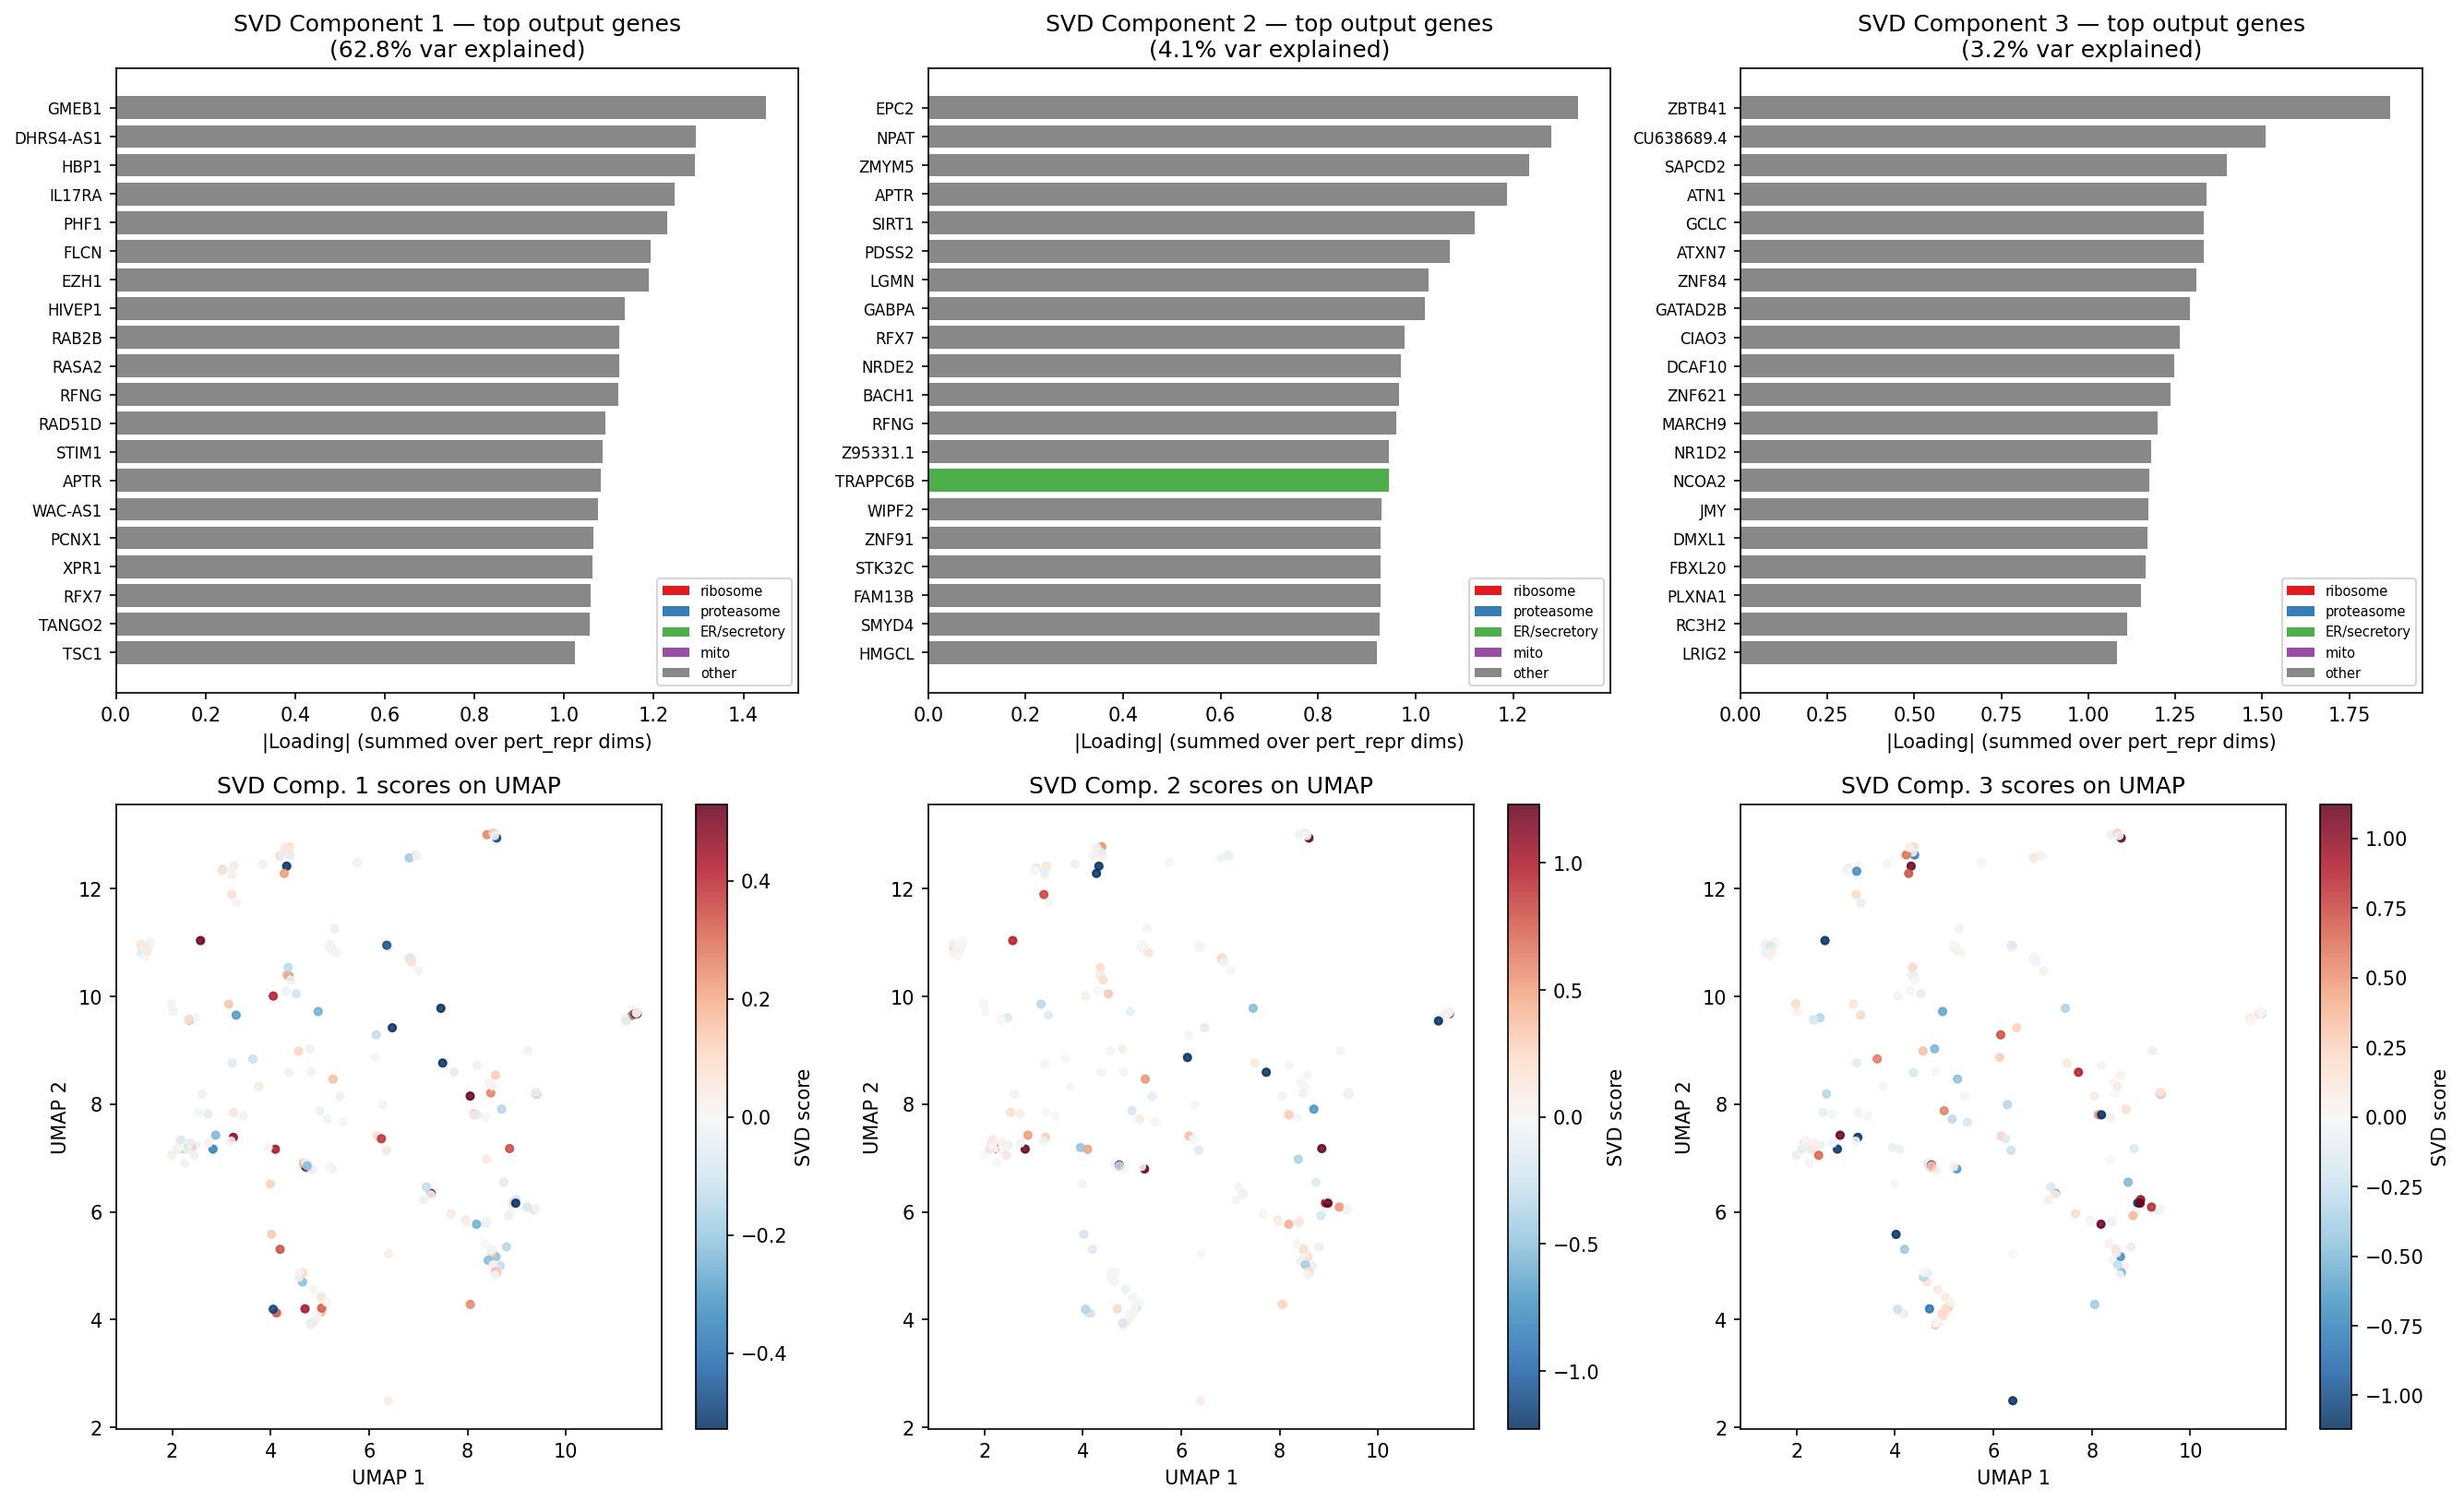

In [11]:

from IPython.display import Image, display
display(Image(filename='/mnt/polished-lake/home/mbeheleramass/jacobian_analysis/nb05_jacobian_svd.png',
              width=1000))


## Part 3 — Does Routing Similarity Predict Output Similarity?

### Key statistics

| Metric | Value | Interpretation |
|---|---|---|
| Pearson r (Jac sim ~ ΔY sim) | **0.119** | p = 2e-80 |
| Spearman r | **0.094** | p = 4e-50 |
| Same-cluster mean Jacobian sim | **0.0199** | |
| Diff-cluster mean Jacobian sim | **0.0104** | |
| Same/Diff ratio | **1.92×** | |
| Wilcoxon p | **1.2e-15** | same > diff cluster |

### Interpretation

**Verdict: WEAK POSITIVE — partial circuit sharing**

The effect is statistically significant (Wilcoxon p=1e-15, Pearson p=2e-80) but the effect size is small: r ≈ 0.12. Same-cluster KDs have nearly 2× higher Jacobian similarity than cross-cluster KDs, confirming that ΔY cluster structure partially maps onto transformer routing structure.

However, the absolute similarities are extremely small (0.01–0.02). Most of the Jacobian variance is in component 1 (62.8%), dominated by a single outlier (PSMC2), not a coherent biological axis.

**What this means for the Model A vs Model B question:**

This falls between the two extremes. The data is inconsistent with pure Model A (completely decorative pert_encoder) — there *is* a statistically significant routing signal. But it is also inconsistent with Model B (internalized circuits producing r > 0.4) — the effect is too weak to conclude that the transformer is systematically using the pert_encoder's geometric structure.

The most likely explanation: the model learned a **partially structured routing map** during fine-tuning. KDs with the most extreme ΔY (high magnitude) tend to cluster together and route similarly, but this may simply reflect overall response magnitude rather than pathway-specific circuit structure.


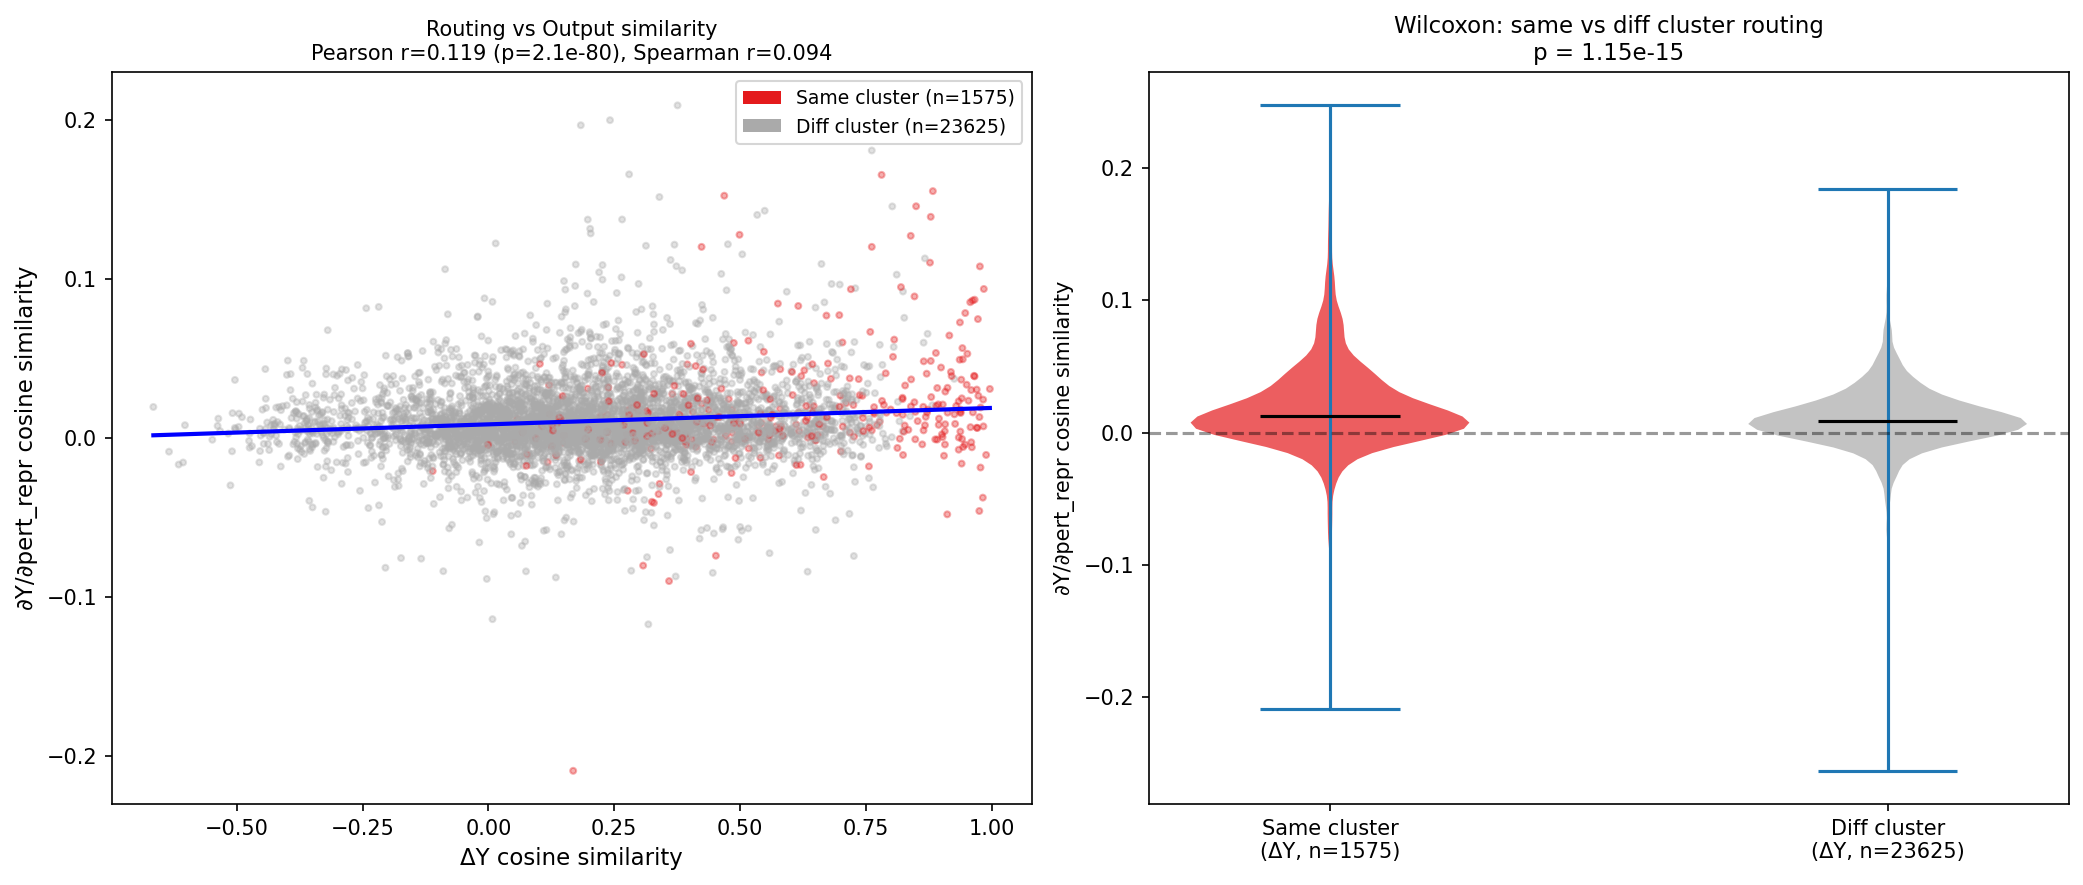

In [12]:

from IPython.display import Image, display
display(Image(filename='/mnt/polished-lake/home/mbeheleramass/jacobian_analysis/nb05_jacobian_vs_output_similarity.png',
              width=900))


## Final Synthesis: NB05 in the Context of the Full Analysis Series

### Connection to prior work

| Prior finding | NB05 result | Synthesis |
|---|---|---|
| **NB02**: pert_encoder clusters by pathway geometry | ΔY clusters partially match (C7=ribosome, C12=ER); Jacobian similarity tracks ΔY | pert_encoder geometry is *partially* reflected in output space — not purely decorative |
| **NB01**: SAE feature clusters — mitoribosome PASS, ER/secretory FAIL | C7 (ribosome) has strong KEGG enrichment (p=9e-26); C12 (ER) has ER processing (p=1e-9) | Output-space clustering confirms the ribosome signal; ER cluster exists but is smaller (n=81 vs. C8's n=512) |
| **NB08**: MYC generalizes (r=0.355), TRAPPC3 doesn't (r=0.001) | TRAPPC3 is in clusters with ribosome/splicing signal, not a clean ER cluster | Consistent: TRAPPC3's pert_repr geometry is fine-tune specific, not backbone-level |
| **NB04**: In-silico KO mean cross-cell-line r=0.057 | Jacobian-ΔY Pearson r=0.119 (same cell line!) — only marginally better | Both confirm: the model routes perturbations largely idiosyncratically, not through shared backbone circuits |

### Overall verdict

The pert_encoder has **weak but non-zero** functional routing structure. The Wilcoxon effect (same-cluster KDs route 1.9× more similarly) is real and significant. But the signal is dominated by response magnitude rather than biological pathway specificity:

- The largest cluster (C8, n=512, p53/NEAT1 response) suggests a **generic stress response mode** dominates HepG2 predictions
- The first SVD component of Jacobians (62.8% variance, driven by PSMC2 outlier) is not biologically interpretable — this is a single extreme KD, not a shared circuit axis
- Components 2-3 (NPAT, SIRT1, GCLC: chromatin/metabolism) explain only 3-4% each

**Conclusion**: The HepG2 fewshot model learned a compressed representation where most KDs produce variations of a generic stress transcriptome. The pert_encoder routes similar-response KDs through similar transformer directions, but this reflects amplitude/direction similarity in the fine-tuned response rather than learned cell-line-specific GRN circuits. This is consistent with the **statistical compression hypothesis (Model A)**, with a weak partial routing structure that falls far short of the criteria for Model B (r > 0.4, biologically interpretable SVD axes).


In [13]:

import subprocess, shutil

src = '/mnt/polished-lake/home/mbeheleramass/notebooks/2026-02-27-01-31_nb05_pert_jacobian_output_clusters_1.ipynb'
dst = '/mnt/polished-lake/home/mbeheleramass/jacobian_analysis/nb05_pert_jacobian_output_clusters.ipynb'

shutil.copy2(src, dst)
print(f"Copied notebook to: {dst}")

# Verify all expected output files exist
import os
expected = [
    'nb05_delta_y_umap.png',
    'nb05_delta_y_pathway_enrichment.png',
    'nb05_jacobian_vs_output_similarity.png',
    'nb05_jacobian_svd.png',
    'nb05_delta_y.parquet',
    'nb05_clusters.csv',
    'nb05_jacobians.npy',
    'nb05_jacobian_kd_names.pkl',
    'nb05_summary.json',
    'nb05_enrichr_results.json',
    'nb05_umap_emb.npy',
]
OUTDIR = '/mnt/polished-lake/home/mbeheleramass/jacobian_analysis'
for fname in expected:
    fpath = f'{OUTDIR}/{fname}'
    exists = os.path.exists(fpath)
    size = os.path.getsize(fpath) if exists else 0
    print(f"  {'OK' if exists else 'MISSING'}: {fname} ({size:,} bytes)")
